# TP - AFD 

> Done by MATHIEU SROUR et OMAR ALLOUCH

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [227]:
data = pd.read_csv('chienloup.csv', sep=';')

In [228]:
data.tail(10)

,SPE,LCB,LSM,LBM,LP,LM,LAM,GENRE
32,LOUP 3,2280,1220,820,247,150,185,LOUP
33,LOUP 4,2320,1230,830,253,168,155,LOUP
34,LOUP 5,2310,1210,780,235,165,196,LOUP
35,LOUP 6,2150,1180,740,257,157,190,LOUP
36,LOUP 7,1840,1000,690,233,158,197,LOUP
37,LOUP 8,1750,940,730,222,148,170,LOUP
38,LOUP 9,2390,1240,770,250,168,270,LOUP
39,LOUP 10,2030,1090,700,233,150,187,LOUP
40,LOUP 11,2260,1180,720,260,160,194,LOUP
41,LOUP 12,2260,1190,770,265,168,193,LOUP


In [229]:
label_encoder = LabelEncoder()

data['GENRE'] = label_encoder.fit_transform(data['GENRE'])
data.head()

,SPE,LCB,LSM,LBM,LP,LM,LAM,GENRE
0,BULL-DOG 1,1290,640,950,175,112,138,0
1,BULL-DOG 2,1540,740,760,200,142,165,0
2,BOXER,1580,710,710,167,125,133,0
3,SAINT-BERNARD,2200,1110,880,225,154,180,0
4,BULL-MASSIF,1900,930,780,197,132,140,0


Chien representé par 0, loup representé par 1

In [230]:
X = data.drop(['GENRE', 'SPE'], axis=1)
y = data['GENRE']

In [231]:
data_chien = data[data['GENRE'] == 0]
data_loup = data[data['GENRE'] == 1]

X_chien = data_chien.drop(['GENRE'], axis=1)
X_loup = data_loup.drop(['GENRE'], axis=1)

### Matrice Intra-variance

In [232]:
classes = np.unique(y)
n_classes = len(classes)
    
overall_mean = np.mean(X, axis=0)
    
S_W = np.zeros((X.shape[1], X.shape[1]))
    
for k in classes:
    X_class_k = np.array(X[y == k])
    mean_class_k = np.mean(X_class_k, axis=0)
        
    for i in range(len(X_class_k)):
        diff = X_class_k[i, :] - mean_class_k
        S_W += np.outer(diff, diff)
    
S_W /= len(y)
S_W

array([[70166.94444444, 36126.58730159,  7473.13492063,  2907.95634921,
         2022.90873016,  2907.53174603],
       [36126.58730159, 20150.3968254 ,  1862.3015873 ,  1526.70634921,
         1034.32539683,  1442.34126984],
       [ 7473.13492063,  1862.3015873 ,  7990.75396825,   482.71825397,
          260.1468254 ,   513.1031746 ],
       [ 2907.95634921,  1526.70634921,   482.71825397,   204.83134921,
          108.97420635,   149.09126984],
       [ 2022.90873016,  1034.32539683,   260.1468254 ,   108.97420635,
           93.39960317,   115.10396825],
       [ 2907.53174603,  1442.34126984,   513.1031746 ,   149.09126984,
          115.10396825,   361.97698413]])

### Inter-variance pour chien

In [233]:
overall_mean = np.mean(X, axis=0)
X_chien_ = X_chien.drop(['SPE'], axis=1)
S_B_chien = np.zeros((X_chien_.shape[1], X_chien_.shape[1]))
X_class_chien = X[y == 0]
n_class_chien = len(X_class_chien)
        
# Calculate the mean of class i
Gk_g = np.zeros((X_chien_.shape[1], 1))
mean_class_chien = np.mean(X_class_chien, axis=0)
Gk_g[:, 0] = mean_class_chien - overall_mean
S_B_chien = (n_class_chien * np.dot(Gk_g, Gk_g.T))/len(y)
S_B_chien

array([[1280.07936508,  921.54195011,  347.01814059,  413.9739229 ,
         180.13265306,  298.92517007],
       [ 921.54195011,  663.42727567,  249.8218335 ,  298.02397149,
         129.67930029,  215.19922255],
       [ 347.01814059,  249.8218335 ,   94.07353418,  112.22465177,
          48.83236152,   81.03595724],
       [ 413.9739229 ,  298.02397149,  112.22465177,  133.87795594,
          58.25437318,   96.67152575],
       [ 180.13265306,  129.67930029,   48.83236152,   58.25437318,
          25.34825073,   42.06472303],
       [ 298.92517007,  215.19922255,   81.03595724,   96.67152575,
          42.06472303,   69.80524781]])

### Inter-variance loup

In [234]:
overall_mean = np.mean(X, axis=0)
X_loup_ = X_loup.drop(['SPE'], axis=1)
S_B_loup = np.zeros((X_loup_.shape[1], X_loup_.shape[1]))
X_class_loup = X[y == 1]
n_class_loup = len(X_class_loup)
        
# Calculate the mean of class i
Gk_g = np.zeros((X_loup_.shape[1], 1))
mean_class_loup = np.mean(X_class_loup, axis=0)
Gk_g[:, 0] = mean_class_loup - overall_mean
S_B_loup = (n_class_loup * np.dot(Gk_g, Gk_g.T))/len(y)
S_B_loup

array([[3200.1984127 , 2303.85487528,  867.54535147, 1034.93480726,
         450.33163265,  747.31292517],
       [2303.85487528, 1658.56818918,  624.55458374,  745.05992873,
         324.19825073,  537.99805637],
       [ 867.54535147,  624.55458374,  235.18383544,  280.56162941,
         122.08090379,  202.5898931 ],
       [1034.93480726,  745.05992873,  280.56162941,  334.69488986,
         145.63593294,  241.67881438],
       [ 450.33163265,  324.19825073,  122.08090379,  145.63593294,
          63.37062682,  105.16180758],
       [ 747.31292517,  537.99805637,  202.5898931 ,  241.67881438,
         105.16180758,  174.51311953]])

### Matrice Inter-variance totale

In [235]:
S_B = (S_B_loup + S_B_chien)
S_B

array([[4480.27777778, 3225.3968254 , 1214.56349206, 1448.90873016,
         630.46428571, 1046.23809524],
       [3225.3968254 , 2321.99546485,  874.37641723, 1043.08390023,
         453.87755102,  753.19727891],
       [1214.56349206,  874.37641723,  329.25736961,  392.78628118,
         170.91326531,  283.62585034],
       [1448.90873016, 1043.08390023,  392.78628118,  468.5728458 ,
         203.89030612,  338.35034014],
       [ 630.46428571,  453.87755102,  170.91326531,  203.89030612,
          88.71887755,  147.22653061],
       [1046.23809524,  753.19727891,  283.62585034,  338.35034014,
         147.22653061,  244.31836735]])

### Matrice de variance totale

In [236]:
S_V = S_B + S_W
S_V

array([[74647.22222222, 39351.98412698,  8687.6984127 ,  4356.86507937,
         2653.37301587,  3953.76984127],
       [39351.98412698, 22472.39229025,  2736.67800454,  2569.79024943,
         1488.20294785,  2195.53854875],
       [ 8687.6984127 ,  2736.67800454,  8320.01133787,   875.50453515,
          431.0600907 ,   796.72902494],
       [ 4356.86507937,  2569.79024943,   875.50453515,   673.40419501,
          312.86451247,   487.44160998],
       [ 2653.37301587,  1488.20294785,   431.0600907 ,   312.86451247,
          182.11848073,   262.33049887],
       [ 3953.76984127,  2195.53854875,   796.72902494,   487.44160998,
          262.33049887,   606.29535147]])

In [237]:
X.cov()

,LCB,LSM,LBM,LP,LM,LAM
LCB,76467.886179,40311.788618,8899.593496,4463.130081,2718.089431,4050.203252
LSM,40311.788618,23020.499419,2803.426249,2632.468060,1524.500581,2249.088269
LBM,8899.593496,2803.426249,8522.938444,896.858304,441.573751,816.161440
LP,4463.130081,2632.468060,896.858304,689.828688,320.495354,499.330430
LM,2718.089431,1524.500581,441.573751,320.495354,186.560395,268.728804
LAM,4050.203252,2249.088269,816.161440,499.330430,268.728804,621.083043


In [238]:
inv_V = np.linalg.inv(S_V)
print(inv_V.shape)
print(S_B.shape)
print(np.linalg.det(inv_V))
print(np.linalg.det(S_B))

(6, 6)
(6, 6)
8.232443350346861e-19
-1.409279339327259e-63


In [239]:
matrice_a_diagonaliser = np.dot(inv_V, S_B)
print(np.linalg.det(matrice_a_diagonaliser))
matrice_a_diagonaliser

-5.807625270664054e-79


array([[-1.15686741e-01, -8.32840427e-02, -3.13616473e-02,
        -3.74127536e-02, -1.62794277e-02, -2.70152614e-02],
       [ 2.61561115e-03,  1.88300465e-03,  7.09068939e-04,
         8.45880996e-04,  3.68068566e-04,  6.10799634e-04],
       [-5.31060325e-02, -3.82315644e-02, -1.43965735e-02,
        -1.71743356e-02, -7.47307611e-03, -1.24013637e-02],
       [ 2.48822259e+00,  1.79129636e+00,  6.74535034e-01,
         8.04683910e-01,  3.50142460e-01,  5.81051755e-01],
       [ 5.29244316e-01,  3.81008281e-01,  1.43473431e-01,
         1.71156064e-01,  7.44752125e-02,  1.23589561e-01],
       [ 3.10913040e-01,  2.23829410e-01,  8.42857623e-02,
         1.00548368e-01,  4.37516551e-02,  7.26046650e-02]])

The matrix can't be always diagonalised, because sometimes the total variance matrix doesn't have an inverse, which is the case when the number of features exceeds the number of samples

In [240]:
G = np.mean(X, axis=0)

# Get unique class labels
unique_labels = np.unique(y)
    
# Number of features
num_features = X.shape[1]
    
# Initialize C matrix
C = np.zeros((num_features, len(unique_labels)))

# Iterate over classes
for c in unique_labels:
    # Select data points from the current class
    class_data = X[y == c]

    # Compute class mean gc
    gc = np.mean(class_data, axis=0)

    # Compute sqrt(Ic) / N
    sqrt_Ic_N = np.sqrt(len(class_data) / len(data))

    # Update the corresponding column in C
    C[:, c-1] = sqrt_Ic_N * (gc - G)

C

array([[ 56.5702962 , -35.77819678],
       [ 40.72552258, -25.75708205],
       [ 15.3357046 ,  -9.69915121],
       [ 18.29466835, -11.5705642 ],
       [  7.96056699,  -5.03470463],
       [ 13.21034139,  -8.35495349]])

In [241]:
np.dot(C, C.T)

array([[4480.27777778, 3225.3968254 , 1214.56349206, 1448.90873016,
         630.46428571, 1046.23809524],
       [3225.3968254 , 2321.99546485,  874.37641723, 1043.08390023,
         453.87755102,  753.19727891],
       [1214.56349206,  874.37641723,  329.25736961,  392.78628118,
         170.91326531,  283.62585034],
       [1448.90873016, 1043.08390023,  392.78628118,  468.5728458 ,
         203.89030612,  338.35034014],
       [ 630.46428571,  453.87755102,  170.91326531,  203.89030612,
          88.71887755,  147.22653061],
       [1046.23809524,  753.19727891,  283.62585034,  338.35034014,
         147.22653061,  244.31836735]])

Now we diagonalize the matrix (𝐂𝒕)*V^-1*(C)

In [242]:
nouveau_matrice_a_diagonaliser = np.dot(np.dot(C.T, inv_V), C)
nouveau_matrice_a_diagonaliser

array([[ 0.58825963, -0.37204806],
       [-0.37204806,  0.23530385]])

In [243]:
eigen_values, eigen_vectors = np.linalg.eig(nouveau_matrice_a_diagonaliser)
print(eigen_values)
print(eigen_vectors)

[8.23563478e-01 4.85702563e-17]
[[ 0.84515425  0.53452248]
 [-0.53452248  0.84515425]]


To retrieve the orignal eigen vectors, we use: a = (V^-1)*C*V

In [244]:
original_eigen_vectors = np.dot(np.dot(inv_V, C), eigen_vectors[0])
print(original_eigen_vectors)

[-7.40720441e-04  1.67472662e-05 -3.40027937e-04  1.59316213e-02
  3.38865181e-03  1.99071772e-03]


In [245]:
projections = np.dot(X,original_eigen_vectors)
projections

array([2.17444411, 2.6092435 , 1.94906011, 2.55457626, 2.20751624,
       2.1470423 , 1.97775218, 2.11583432, 2.2367932 , 2.24627932,
       1.9951233 , 2.10157996, 2.00490597, 2.08726656, 2.48651836,
       2.26072853, 2.2804534 , 2.4002713 , 2.38678093, 2.1846795 ,
       2.16564422, 2.22653195, 1.97853708, 2.2868672 , 2.40379044,
       2.26459779, 2.09901403, 2.22695067, 2.02711742, 2.11410282,
       2.91185479, 2.94797993, 2.86445715, 2.92845946, 2.7372174 ,
       3.18027352, 3.05884851, 2.84802366, 3.07831585, 2.86920221,
       3.17151852, 3.2594612 ])

## AFD in Python

In [246]:
overall_mean = np.mean(X, axis=0)
X_centered = X - overall_mean
X_centered.head()

,LCB,LSM,LBM,LP,LM,LAM
0,-758.333333,-425.47619,224.52381,-35.690476,-31.02381,-30.119048
1,-508.333333,-325.47619,34.52381,-10.690476,-1.02381,-3.119048
2,-468.333333,-355.47619,-15.47619,-43.690476,-18.02381,-35.119048
3,151.666667,44.52381,154.52381,14.309524,10.97619,11.880952
4,-148.333333,-135.47619,54.52381,-13.690476,-11.02381,-28.119048


In [247]:
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the centered data
lda.fit(X_centered, y)

# Transform the centered data to the LDA space
lda_transformed_data = lda.transform(X_centered)
lda_transformed_data[:5]

array([[ 1.52597631],
       [-1.07136054],
       [ 2.87234013],
       [-0.74479792],
       [ 1.32841519]])

In [248]:
matrice_a_diagonaliser1 = np.dot(inv_V, S_B)

W = X.cov()
inv_W  = np.linalg.inv(W)
matrice_a_diagonaliser2 = np.dot(inv_W, S_B)
eigen_values_1, eigen_vectors_1 = np.linalg.eig(matrice_a_diagonaliser1)
eigen_values_2, eigen_vectors_2 = np.linalg.eig(matrice_a_diagonaliser2)

In [249]:
print("Eigen values of V(^-1)B:", eigen_values_1)
print("Eigen values of W(^-1)B:", eigen_values_2)
print("Difference absolue des valeurs propres:", np.abs(eigen_values_1-eigen_values_2))

Eigen values of V(^-1)B: [ 8.23563478e-01+0.00000000e+00j -2.34046408e-17+6.01202877e-16j
 -2.34046408e-17-6.01202877e-16j -4.38757891e-16+0.00000000e+00j
  2.58046762e-18+5.74806322e-17j  2.58046762e-18-5.74806322e-17j]
Eigen values of W(^-1)B: [ 8.03954824e-01+0.00000000e+00j  1.73269635e-16+2.04517124e-16j
  1.73269635e-16-2.04517124e-16j -7.73255862e-17+1.93772314e-16j
 -7.73255862e-17-1.93772314e-16j -3.29243923e-17+0.00000000e+00j]
Difference absolue des valeurs propres: [1.96086542e-02 4.42764450e-16 4.42764450e-16 4.10098794e-16
 2.63653220e-16 6.75619579e-17]


La valeur propre du premier axe est enormement plus grande que celles des autres axes.

Le rapport entre eigen_value1/eigen_value2 = 10^15.

In [250]:
print("Eigen values of V(^-1)B:", eigen_vectors_1)
print("Eigen values of W(^-1)B:", eigen_vectors_2)
print("Difference absolue des valeurs propres:", np.abs(eigen_vectors_1-eigen_vectors_2))

Eigen values of V(^-1)B: [[ 0.0450849 +0.j          0.00781619-0.07532431j  0.00781619+0.07532431j
   0.04988933+0.j         -0.04200558+0.06226374j -0.04200558-0.06226374j]
 [-0.00101934+0.j          0.01321988+0.12675636j  0.01321988-0.12675636j
  -0.2050133 +0.j         -0.05008994+0.05749268j -0.05008994-0.05749268j]
 [ 0.02069624+0.j          0.01442417+0.00504852j  0.01442417-0.00504852j
  -0.0933039 +0.j         -0.04133852-0.24298427j -0.04133852+0.24298427j]
 [-0.96969862+0.j         -0.5539384 -0.0162025j  -0.5539384 +0.0162025j
  -0.04202746+0.j         -0.13156999-0.0088017j  -0.13156999+0.0088017j ]
 [-0.20625465+0.j          0.79288175+0.j          0.79288175-0.j
  -0.45497562+0.j          0.94234437+0.j          0.94234437-0.j        ]
 [-0.12116759+0.j          0.19837304-0.05163407j  0.19837304+0.05163407j
   0.85907268+0.j         -0.00336128-0.14960542j -0.00336128+0.14960542j]]
Eigen values of W(^-1)B: [[ 0.0450849 +0.j         -0.05856472-0.02118787j -0.05856472+0.

In [251]:
SCT1 = np.sum(eigen_values_1)
discriminant_powers1 = eigen_values_1 / SCT1
print(np.abs(discriminant_powers1))

SCT2 = np.sum(eigen_values_2)
discriminant_powers2 = eigen_values_2 / SCT2
print(np.abs(discriminant_powers2))

[1.00000000e+00 7.30554825e-16 7.30554825e-16 5.32755401e-16
 6.98653192e-17 6.98653192e-17]
[1.00000000e+00 3.33411514e-16 3.33411514e-16 2.59506060e-16
 2.59506060e-16 4.09530379e-17]


We choose the first axis only.

In [252]:
coefficients = lda.coef_
coefficients

array([[-0.02065149,  0.00046692, -0.00948007,  0.44417797,  0.09447654,
         0.05550176]])

In [253]:
coefficients = coefficients.reshape(-1, 1)

# Calculate the score on the first discriminant axis
lda_scores = np.dot(X, coefficients)

print("Linear Combination for the First Discriminant Axis:")
print(f"Z_1 = {coefficients[0][0]} * X_1 + {coefficients[1][0]} * X_2 + ... + {coefficients[-1][0]} * X_p")

Linear Combination for the First Discriminant Axis:
Z_1 = -0.020651488843744077 * X_1 + 0.000466918371122392 * X_2 + ... + 0.05550175543360995 * X_p


On a 2 classes: chien et loup, donc on aura un seul axes pour la projection, donc la qualite de projection sera 1.

### Contribution absolue of class chien

In [254]:
group_data = X[y == 0]

gk = np.mean(group_data, axis=0)
contribution_chien = (len(group_data)/len(y)) * np.square(np.dot(np.dot(eigen_vectors_1.T, inv_V), gk))
np.abs(contribution_chien)

array([0.0069318 , 1.35719253, 1.35719253, 0.49690253, 1.52103655,
       1.52103655])

### Contributions absolue of class loup

In [255]:
group_data = X[y == 1]

gk = np.mean(group_data, axis=0)
contribution_loup = (len(group_data)/len(y)) * np.square(np.dot(np.dot(eigen_vectors_1.T, inv_V), gk))
np.abs(contribution_loup)

array([5.32547468e-05, 5.19700261e-01, 5.19700261e-01, 2.00017996e-01,
       6.13302830e-01, 6.13302830e-01])

### Contribution relative of class chien

In [256]:
group_data = X[y == 0]

gk = np.mean(group_data, axis=0)
contribution_chien = (len(group_data)/len(y)) * np.square(np.dot(np.dot(eigen_vectors_1.T, inv_V), gk))
contribution_relative_chien = contribution_chien/eigen_values_1
np.abs(contribution_relative_chien)

array([8.41684287e-03, 2.25575312e+15, 2.25575312e+15, 1.13252101e+15,
       2.64350978e+16, 2.64350978e+16])

### Contribution relative of class loup

In [257]:
group_data = X[y == 1]

contribution_loup = (len(group_data)/len(y)) * np.square(np.dot(np.dot(eigen_vectors_1.T, inv_V), gk))
contribution_relative_loup = contribution_loup/eigen_values_1
np.abs(contribution_relative_loup)

array([3.36673715e-03, 9.02301249e+14, 9.02301249e+14, 4.53008405e+14,
       1.05740391e+16, 1.05740391e+16])

## 9) Avec reduction

We are gonna standardize each class apart, because chien class is dominant (cz the data is imbalanced), in order to prevent the dominant class from having a disproportionate influence.

In [260]:
X_chien_to_reduce = X_chien.drop(['SPE'], axis=1)
X_loup_to_reduce = X_loup.drop(['SPE'], axis=1)

standardized_data_part1 = (X_chien_to_reduce - X_chien_to_reduce.mean(axis=0)) / X_chien_to_reduce.std(axis=0)
standardized_data_part2 = (X_loup_to_reduce - X_loup_to_reduce.mean(axis=0)) / X_loup_to_reduce.std(axis=0)

X_standardized = np.vstack([standardized_data_part1, standardized_data_part2])

lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the centered data
lda.fit(X_standardized, y)  

cov_matrix = np.cov(X_standardized, rowvar=False)


In [261]:
num_samples_part1 = len(X_chien)
num_samples_part2 = len(X_loup)
total_num_samples = num_samples_part1 + num_samples_part2

weight_part1 = num_samples_part1 / total_num_samples
weight_part2 = num_samples_part2 / total_num_samples

inter_class_cov_matrix = (weight_part1 * np.cov(standardized_data_part1, rowvar=False) +
                          weight_part2 * np.cov(standardized_data_part2, rowvar=False))

In [262]:
coefficients = lda.coef_
coefficients

array([[ 3.12804159e-14, -3.05544029e-14, -3.94279472e-15,
         3.76539665e-15,  1.14934611e-15, -5.06131214e-15]])

The coef are now much smaller

In [263]:
classes = np.unique(y)
n_classes = len(classes)
    
# Calculate the overall mean
overall_mean = np.mean(X_standardized, axis=0)
    
# Initialize the interclass variance matrix
S_B = np.zeros((X_standardized.shape[1], X_standardized.shape[1]))
Gk_g = np.zeros((X_standardized.shape[1], 1))

for i in classes:
    # Select data points belonging to class i
    X_class_i = X_standardized[y == i]
    n_class_i = len(X_class_i)
        
    # Calculate the mean of class i
    mean_class_i = np.mean(X_class_i, axis=0)
    Gk_g[:, 0] = mean_class_i - overall_mean
    S_B += n_class_i * np.dot(Gk_g, Gk_g.T)

# Normalize by the total number of observations
S_B /= len(y)   

inv_cov_matrix = np.linalg.inv(cov_matrix)
eigenvalues, eigenvectors = np.linalg.eig(np.dot(inv_cov_matrix, S_B))

In [264]:
# Initialize an empty array to store the correlation coefficients
correlation_coefficients = np.zeros((len(eigenvectors), X_standardized.shape[1]))

# Calculate the correlation coefficients for each variable with each discriminant axis
correlation_coefficients = eigenvectors*np.sqrt(eigenvalues)

posx and posy should be finite values


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


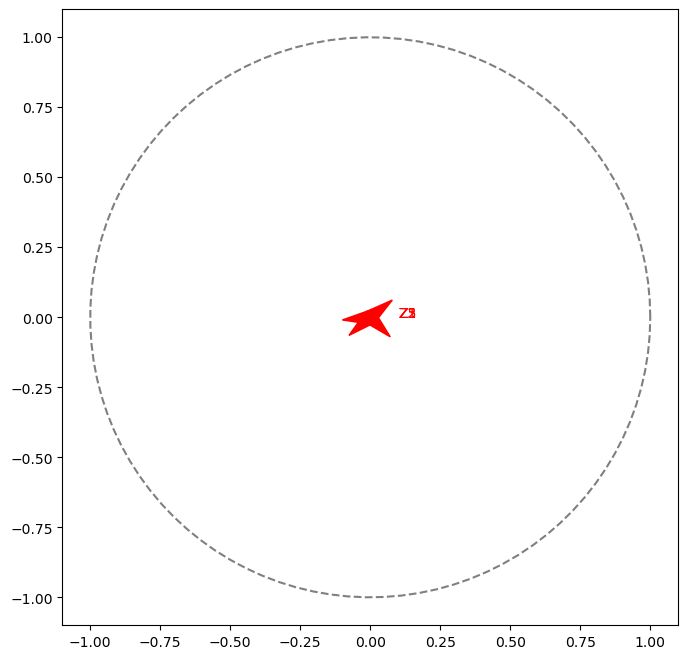

In [265]:
angles = np.linspace(0, 2 * np.pi, 100)
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(np.cos(angles), np.sin(angles), linestyle='dashed', color='gray')
for j in range(X_standardized.shape[1]):
    ax.arrow(0, 0, correlation_coefficients[0, j], correlation_coefficients[1, j], head_width=0.05, head_length=0.1, fc='r', ec='r')
    ax.text(correlation_coefficients[0, j] + 0.1, correlation_coefficients[1, j], f'Z{j+1}', color='r')
ax.set_aspect('equal', adjustable='box')